In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,root_mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [12]:
df = pd.read_csv('winequality-red.csv')
df.head()


#class\t - accetable or unacceptable 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [13]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [14]:
x = df[['alcohol', 'sulphates', 'volatile acidity', 'citric acid', 'density']]
y = df['quality']

x_train , x_test , y_train , y_test = train_test_split(x, y , test_size=0.2,random_state=42)

model = KNeighborsClassifier(n_neighbors=9)
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

print(" KNN accuracy score: ",accuracy_score(y_test,y_pred))
print("confusion matrix: \n",confusion_matrix(y_test,y_pred))
print("root mean square: \n",root_mean_squared_error(y_test,y_pred))

 KNN accuracy score:  0.559375
confusion matrix: 
 [[ 0  0  1  0  0  0]
 [ 0  1  7  2  0  0]
 [ 0  0 95 34  1  0]
 [ 0  0 46 68 18  0]
 [ 0  0  5 22 15  0]
 [ 0  0  1  0  4  0]]
root mean square: 
 0.7416198487095663


In [15]:

model1 = LogisticRegression()
model1.fit(x_train,y_train)

y_pred1 = model1.predict(x_test)

print("accuracy score: ",accuracy_score(y_test,y_pred1))
print("confusion matrix: \n",confusion_matrix(y_test,y_pred1))
print("root mean square: \n",root_mean_squared_error(y_test,y_pred1))


accuracy score:  0.55625
confusion matrix: 
 [[  0   0   1   0   0   0]
 [  0   0  10   0   0   0]
 [  0   0 101  27   2   0]
 [  0   0  55  73   4   0]
 [  0   0   2  36   4   0]
 [  0   0   0   2   3   0]]
root mean square: 
 0.7137051211810099


d:\Machine Learning\machine\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:

model2 = RandomForestClassifier(n_estimators=100,random_state=42)
model2.fit(x_train,y_train)

y_pred2 = model2.predict(x_test)

print("accuracy score: ",accuracy_score(y_test,y_pred2))
print("confusion matrix:\n ",confusion_matrix(y_test,y_pred2))
print("root mean square: \n",root_mean_squared_error(y_test,y_pred2))

accuracy score:  0.65625
confusion matrix:
  [[  0   0   1   0   0   0]
 [  0   0   6   4   0   0]
 [  0   0 100  29   1   0]
 [  0   0  31  89  12   0]
 [  0   0   1  19  21   1]
 [  0   0   0   0   5   0]]
root mean square: 
 0.6398241946034864


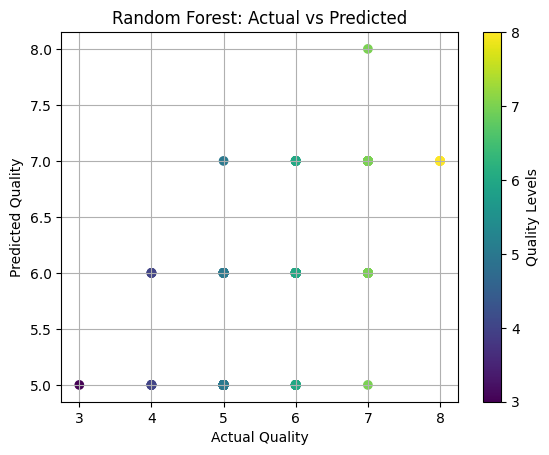

In [17]:
plt.scatter(y_test,y_pred2,c=y_test,cmap='viridis')
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Random Forest: Actual vs Predicted")
plt.colorbar(label="Quality Levels")
plt.grid()
plt.show()

In [18]:

model3 = DecisionTreeClassifier()
model3.fit(x_train,y_train)

y_pred3 = model3.predict(x_test)

print("accuracy score: ",accuracy_score(y_test,y_pred3))
print("confusion matrix:\n ",confusion_matrix(y_test,y_pred3))
print("root mean square: \n",root_mean_squared_error(y_test,y_pred3))


accuracy score:  0.603125
confusion matrix:
  [[ 0  0  1  0  0  0]
 [ 0  1  6  3  0  0]
 [ 0  1 92 35  1  1]
 [ 0  8 36 72 12  4]
 [ 1  1  1 10 28  1]
 [ 0  0  0  1  4  0]]
root mean square: 
 0.81967981553775


In [19]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [20]:

#x = df[['alcohol', 'sulphates', 'volatile acidity', 'citric acid', 'density']]
new = [[9.9,0.59,0.71,0.50,0.99995]]
new_data = model.predict(new)
print("quality: ",new_data)

quality:  [5]


d:\Machine Learning\machine\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
